# Introduction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

# Data Import

This section involves importing the data into the code and reading it as pandas dataframe.

### Read the data

Training data from a different file or location can be read by __changing the argument value__ of the `pd.read_csv()` function with the path to the file.

In [2]:
train_data=pd.read_csv('CreditCard_train.csv')

In [3]:
train_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
train_data.rename(columns=(train_data.iloc[0]),inplace=True)
train_data.drop(index=[0],inplace=True)
train_data.rename(columns={'default payment next month':'Y'},inplace=True)

In [5]:
train_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
train_data.dtypes

ID           object
LIMIT_BAL    object
SEX          object
EDUCATION    object
MARRIAGE     object
AGE          object
PAY_0        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
BILL_AMT1    object
BILL_AMT2    object
BILL_AMT3    object
BILL_AMT4    object
BILL_AMT5    object
BILL_AMT6    object
PAY_AMT1     object
PAY_AMT2     object
PAY_AMT3     object
PAY_AMT4     object
PAY_AMT5     object
PAY_AMT6     object
Y            object
dtype: object

In [7]:
train_data=train_data.astype(int)

# Data Transformation and Exploration

### Analysing the data 

ID has been set as index since this feature does not determine the outcome Y.

In [8]:
train_data.set_index('ID',inplace=True)

Next, the number of unique entries in each column is investigated to verify the categorical columns.

In [9]:
train_data.nunique()

LIMIT_BAL       79
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             55
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    18717
BILL_AMT2    18367
BILL_AMT3    18132
BILL_AMT4    17720
BILL_AMT5    17284
BILL_AMT6    16906
PAY_AMT1      6918
PAY_AMT2      6839
PAY_AMT3      6424
PAY_AMT4      6028
PAY_AMT5      5984
PAY_AMT6      5988
Y                2
dtype: int64

In [10]:
train_data['PAY_0'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [11]:
train_data.loc[(train_data['PAY_0']==-2)&(train_data['PAY_2']==-2)&(train_data['PAY_3']==-2)
               &(train_data['PAY_4']==-2)].shape

(1708, 24)

In [12]:
train_data.loc[(train_data['PAY_0']==0)&(train_data['PAY_2']==0)&(train_data['PAY_3']==0)
               &(train_data['PAY_4']==0)].shape

(9216, 24)

In [13]:
def age_conditions(df):
    if(df['AGE']<=24):
        return 0 #junior
    elif(df['AGE']<=65):
        return 1 #middle-aged
    else:
        return 2 #senior

In [14]:
train_data['AGE_BINS'] = train_data.apply(age_conditions, axis=1)

In [15]:
train_data.drop(columns='AGE',inplace=True)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,AGE_BINS
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,2,2,-1,-1,-2,-2,...,0,0,0,689,0,0,0,0,1,0
2,120000,2,2,2,-1,2,0,0,0,2,...,3455,3261,0,1000,1000,1000,0,2000,1,1
3,90000,2,2,2,0,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,1
4,50000,2,2,1,0,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,1
5,50000,1,2,1,-1,0,-1,0,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,1
6,50000,1,1,2,0,0,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,1
7,500000,1,1,2,0,0,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,1
8,100000,2,2,2,0,-1,-1,0,0,-1,...,-159,567,380,601,0,581,1687,1542,0,0
9,140000,2,3,1,0,0,2,0,0,0,...,11793,3719,3329,0,432,1000,1000,1000,0,1


In [16]:
train_data=train_data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE_BINS', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y']]

### Checking the balance of the dataset

Firstly, we have to check for imbalance in data, i.e. if the difference between the number of samples for each category is really high then the dataset is imbalanced. This will affect in training the model. 

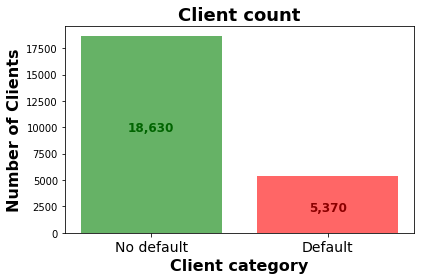

In [17]:
count_val=train_data['Y'].value_counts()

#Visualising the count
X_ticks=['No default','Default']
bar_width=0.7
fig,ax=plt.subplots()
plt.bar(1,count_val[0],color='g', alpha=0.6)
plt.bar(2,count_val[1],color='r', alpha=0.6)
plt.text(1, count_val[0]/2, "{:,}".format(count_val[0]),color='darkgreen', ha='center', va= 'bottom',fontweight='bold',fontsize=12)
plt.text(2, count_val[1]/3, "{:,}".format(count_val[1]), color='darkred',ha='center', va= 'bottom',fontweight='bold',fontsize=12)
ax.set_title('Client count',fontsize=18,fontweight='bold')
ax.set_xlabel('Client category',fontsize=16,fontweight='bold')
ax.set_ylabel('Number of Clients',fontsize=16,fontweight='bold')
ax.set_xticks([1,2])
ax.set_xticklabels(X_ticks,fontsize=14)
fig.tight_layout()
plt.show()

From the above observation it can be seen that the training data is not balanced. The number of samples there is higher number of samples for 'No default' class is much higher than that for 'Default' class.
Therefore, undersampling or oversampling is required.

### Calculate the correlation between the features

In [18]:
correlation = train_data.corr()
corr_array  = np.array(correlation)

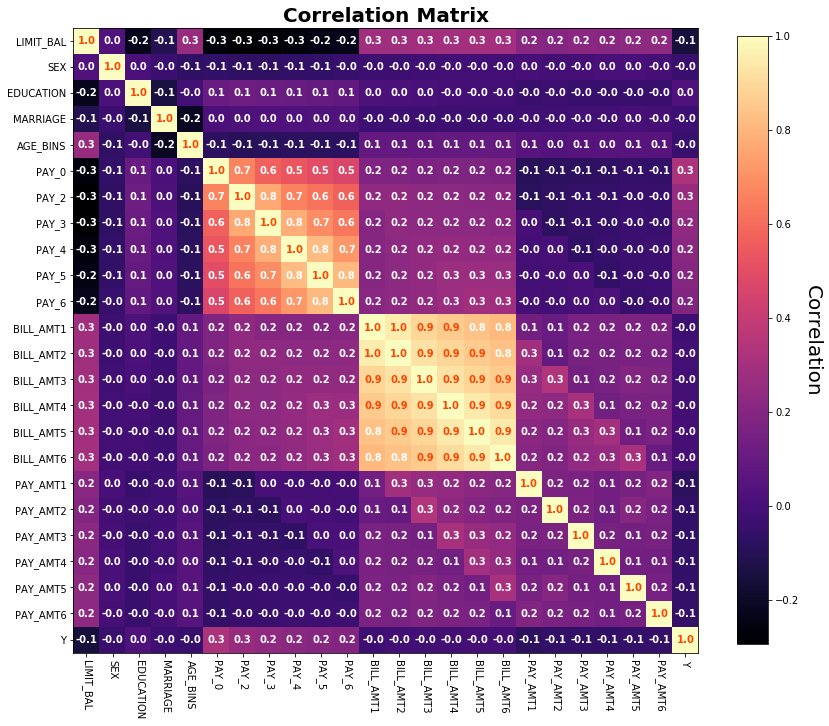

In [19]:
fig, ax = plt.subplots(figsize=(14,14))
im = ax.imshow(corr_array,cmap='magma')
cbar = ax.figure.colorbar(im, ax=ax,shrink=0.8)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom",fontsize=20)
data = im.get_array()
textcolors=['#FFFFFF','#FF4500']
for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, '%1.1f'%data[i, j], color=textcolors[data[i, j]>0.85],ha='center',va='center',fontweight='bold')
ax.set_title('Correlation Matrix',fontsize=20,fontweight='bold')
ax.set_xticks(np.arange(len(train_data.columns.tolist())))
ax.set_yticks(np.arange(len(train_data.columns)))
ax.set_xticklabels(train_data.columns,rotation=-90)
ax.set_yticklabels(train_data.columns)
fig.show()

# Methodology Overview

# Model training and validation

# Results

# Final Predictions on test set

# References

[1] Yeh, I-Cheng, and Che-hui Lien. "The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients." Expert Systems with Applications 36.2 (2009): 2473-2480.

[2] Preda, G. (2018). Default of Credit Card Clients - Predictive Models. [online] Kaggle. Available at: https://www.kaggle.com/gpreda/default-of-credit-card-clients-predictive-models/notebook?scriptVersionId=5201547 [Accessed 6 Dec. 2018].

[3]